In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
s=31

cov=np.loadtxt("jla_mub_covmatrix.txt")
data=np.loadtxt("jla_mub_0.txt")
covariance=cov.reshape(31,31)                              #To create a 31x31 matrix
cov_inverse=np.linalg.inv(covariance)                      #Inverse of a covariance matrix

#print(data)

z=data[:,0]
#print(z)
nu_obs=data[:,1]
#print (nu_obs)

Functions

In [ ]:
def eta(a,om):
    s=((1.0-om)/om)**(1.0/3.0)
    n=2.0*(np.sqrt((s**3)+1))*((a**(-4.0))-(0.1540*s*(a**(-3.0)))+(0.4304*(s**2)*(a**(-2.0)))+(0.19097*(s**3)*(a**(-1.0)))+(0.066941*(s**4)))**(-1.0/8.0)
    return n

def DL(z,om):
    eta1=eta(1,om)
    eta2=eta(1/(1+z),om)
    d=(3000.0*(1+z))*(eta1-eta2)
    return d

def nu(z,om,h):                     
    d=DL(z,om)
    m=25-(5*np.log10(h))+(5*np.log10(d))
    return m

def likelihood(h,om): 
    L=0
    nu_theory=nu(z,h,om)
    for i in range(31):
        for j in range(31):
            L=L+((nu_obs[i]-nu_theory[i])*cov_inverse[i,j]*(nu_obs[j]-nu_theory[j]))
    return -0.5*L

MCMC Code

In [10]:
def M_chain(steps,sigma):
    h_vals=np.zeros(steps)
    omega_vals=np.zeros(steps)
    burn_in = int(0.1*steps)
    h_vals[0] = 0.8
    omega_vals[0] = 0.7
    acceptance=0

    for i in range(1,steps):
        h_curr = h_vals[i-1]
        om_curr = omega_vals[i-1]
    
        h_proposed = np.random.normal(h_curr,sigma)
        omega_proposed = np.random.normal(om_curr,sigma)
    
        p1 = likelihood(h_curr,om_curr)
        if h_proposed<0 or h_proposed>1 or omega_proposed<0 or omega_proposed>1:
            p2 = -np.inf
        else:
            p2 = likelihood(h_proposed,omega_proposed)
    
        accep_prob  = min(1,np.exp(p2-p1))
        alpha = np.random.rand(1)[0]
        if alpha<accep_prob:
            h_vals[i] = h_proposed
            omega_vals[i] = omega_proposed
            acceptance=acceptance+1
        else:
            h_vals[i] = h_curr
            omega_vals[i] = om_curr
    
    plt.hist(h_vals[burn_in:],bins=30)
    plt.xlabel('h-values', fontsize='15')
    plt.ylabel('Frequency', fontsize='15')
    plt.title("h-parameter posterior distribution")
    plt.savefig("h_parameter_res.pdf")
    plt.show()
    
    
    plt.hist(omega_vals[burn_in:],bins = 30)
    plt.xlabel('$\Omega_m$-value', fontsize='15')
    plt.ylabel('Frequency', fontsize='15')
    plt.title("$\Omega_m$-parameter posterior distribution")
    plt.savefig("$\Omega_parameter_res.pdf")
    plt.show()
    
    
    plt.figure(figsize=(15,10))
    plt.scatter(h_vals,omega_vals,marker='o')
    plt.xlabel('h-value', fontsize='21')
    plt.ylabel('$\Omega_m$-value', fontsize='21')
    plt.show()
    
    plt.figure(figsize=(15,10))
    plt.scatter(h_vals[burn_in:],omega_vals[burn_in:],marker='o')
    plt.xlabel('h-value', fontsize='21')
    plt.ylabel('$\Omega_m$-value', fontsize='21')
    plt.savefig("resscatter.pdf")
    plt.show()
    
    
    mean_h_vals=np.mean(h_vals)
    mean_omega_vals=np.mean(omega_vals)
    var_h_vals=np.var(h_vals)
    var_omega_vals=np.var(omega_vals)
    
    
    acceptance_ratio=acceptance/steps
    print(acceptance_ratio)
    
    return mean_h_vals,mean_omega_vals,var_h_vals,var_omega_vals,acceptance_ratio

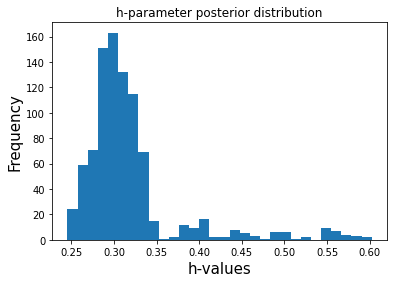

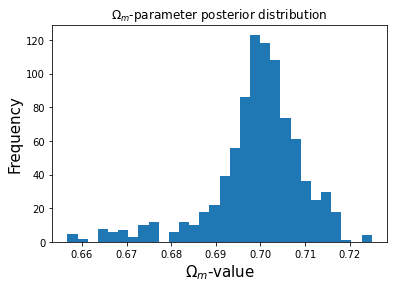

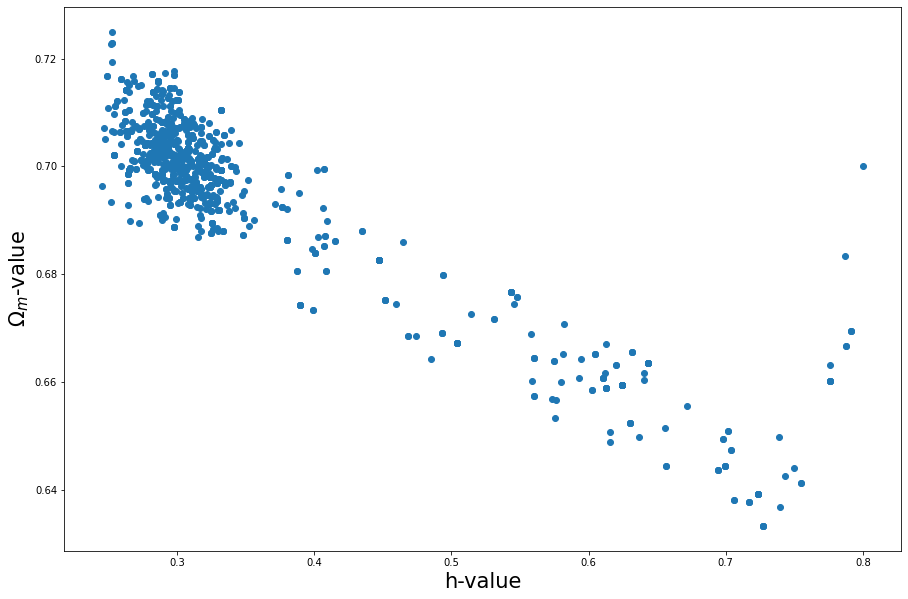

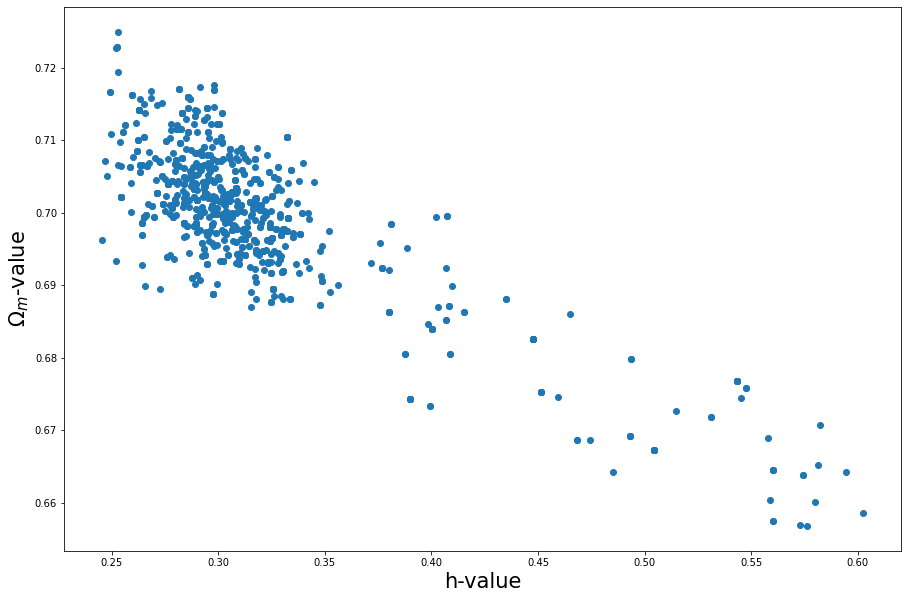

0.531
mean of the parameter 'h' under the posterior distribution: 0.3538617473236557
mean of the parameter 'omega_matter' under the posterior distribution: 0.6947788286635479
variance of the parameter 'h' under the posterior distribution: 0.015232767971123468
variance of the parameter 'omega_matter' under the posterior distribution: 0.00029234593152191625


In [11]:
a=M_chain(1000,0.01)
#a_small=M_chain(1000,0.001)
#a_big=M_chain(1000,100)
#b=M_chain(1000,100)




print("mean of the parameter 'h' under the posterior distribution:",a[0])
print("mean of the parameter 'omega_matter' under the posterior distribution:",a[1])
print("variance of the parameter 'h' under the posterior distribution:",a[2]) 
print("variance of the parameter 'omega_matter' under the posterior distribution:",a[3])     
    

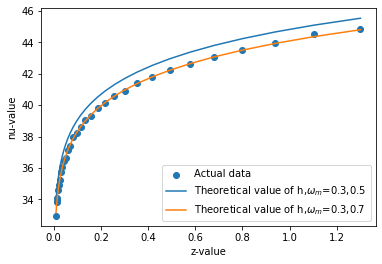

In [14]:
nu1=nu(z,0.3,0.5)
nu2=nu(z,0.3,0.7)
               
plt.xlabel("z-value")
plt.ylabel("nu-value")
plt.scatter(z,nu_obs,label="Actual data" )
plt.plot(z,nu1,label="Theoretical value of h,$\Omega_m$=0.3,0.5")
plt.plot(z,nu2,label="Theoretical value of h,$\Omega_m$=0.3,0.7")
plt.legend()
plt.show()

Change of Acceptance ratio with size of proposal distribution

In [ ]:
# sigma1 = np.linspace(0.001,0.01,10)
# sigma2 = np.linspace(0.02,0.1,10)
# sigma3 = np.linspace(0.2,1.0,10)
# sigma4 = np.linspace(2,10,10)
# sigma5 = np.linspace(11,100,10)

# sigma = np.concatenate([sigma1,sigma2,sigma3,sigma4,sigma5])

# AR_values = np.zeros(len(sigma))

# for i in range(len(sigma)):
#     AR_values[i] = M_chain(1000,sigma[i])

In [ ]:
# plt.xscale('log')
# plt.scatter(sigma,AR_values)
# plt.xlabel("standard deviation")
# plt.ylabel("Acceptance ratio")
# plt.title('Variation of acceptance ratio with size of proposal distribution')
   
# plt.savefig("AR.pdf")   